In [1]:
#Find out percentage of Malaysian population changes by years

#Caveat of the data:

- The data from 1991 onwards is the most granular, with ethnic group breakdowns providing differentiation between Malay and Other Bumiputera, as well as Other Citizen and Other Non-Citizen. Furthermore, the oldest age category is 85+, i.e. 85 years and above.

- The data from 1980-1990 contains a breakdown by ethnic group, but without differentiation between Malay and Other Bumiputera (i.e. there is only one Bumiputera category), or Other Citizen and Other Non-Citizen (i.e. there is only one residual category, Other). Furthermore, the 85+ age group is not present; the oldest age category is 80+.

- For data from 1970-1979, there is no breakdown by ethnic group. Furthermore, the 75+, 80+ and 85+ age groups are not present; the oldest age category is 70+.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# If not already installed, do: pip install pandas fastparquet
import pandas as pd

URL_DATA = 'https://storage.dosm.gov.my/population/population_malaysia.parquet'

df = pd.read_parquet(URL_DATA)
if 'date' in df.columns: df['date'] = pd.to_datetime(df['date'])
data = df
print(data)

            date   sex      age         ethnicity  population
0     1970-01-01  both  overall           overall     10881.8
1     1970-01-01  both      0-4           overall      1702.4
2     1970-01-01  both      5-9           overall      1690.3
3     1970-01-01  both    10-14           overall      1454.7
4     1970-01-01  both    15-19           overall      1197.6
...          ...   ...      ...               ...         ...
17011 2024-01-01  male      85+        bumi_other        10.0
17012 2024-01-01  male      85+           chinese        14.9
17013 2024-01-01  male      85+            indian         4.4
17014 2024-01-01  male      85+     other_citizen         0.6
17015 2024-01-01  male      85+  other_noncitizen        11.7

[17016 rows x 5 columns]


In [5]:
data.head(3)

,date,sex,age,ethnicity,population
0,1970-01-01,both,overall,overall,10881.8
1,1970-01-01,both,0-4,overall,1702.4
2,1970-01-01,both,5-9,overall,1690.3


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17016 entries, 0 to 17015
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        17016 non-null  datetime64[ns]
 1   sex         17016 non-null  object        
 2   age         17016 non-null  object        
 3   ethnicity   17016 non-null  object        
 4   population  17016 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 664.8+ KB


In [7]:
data['date'] = pd.to_datetime(data['date'])

In [8]:
data.isna().sum()

date          0
sex           0
age           0
ethnicity     0
population    0
dtype: int64

In [9]:
data['sex'].value_counts()

sex
both      5672
female    5672
male      5672
Name: count, dtype: int64

In [10]:
data['age'].value_counts()

age
overall    909
35-39      909
65-69      909
60-64      909
55-59      909
50-54      909
0-4        909
40-44      909
45-49      909
30-34      909
25-29      909
20-24      909
15-19      909
10-14      909
5-9        909
70-74      879
75-79      879
80-84      714
85+        714
80+        165
70+         30
Name: count, dtype: int64

In [11]:
data['ethnicity'].value_counts()

ethnicity
overall             3012
chinese             2532
indian              2532
bumi_malay          1938
bumi_other          1938
other_citizen       1938
other_noncitizen    1938
bumi                 594
other                594
Name: count, dtype: int64

In [12]:
data['age'].value_counts()

age
overall    909
35-39      909
65-69      909
60-64      909
55-59      909
50-54      909
0-4        909
40-44      909
45-49      909
30-34      909
25-29      909
20-24      909
15-19      909
10-14      909
5-9        909
70-74      879
75-79      879
80-84      714
85+        714
80+        165
70+         30
Name: count, dtype: int64

In [13]:
data['date'].min()

Timestamp('1970-01-01 00:00:00')

In [14]:
data['date'].max()

Timestamp('2024-01-01 00:00:00')

In [15]:
date_diff = (data['date'].max() - data['date'].min())

# Helper function to convert timedelta to years, months, and days
def convert_timedelta(td):
    days = td.days
    months, days = divmod(days, 30)
    years, months = divmod(months, 12)
    return years, months, days

years, months, days = convert_timedelta(date_diff)

print(f'Range of dates: {years} years, {months} months, {days} days')


Range of dates: 54 years, 9 months, 13 days


In [16]:
data['year'] = data['date'].dt.year

In [17]:
#subset the data to contain only data from year 1991 - 2023

sub_data = data[(data['year'] >= 2000 ) & (data['year'] <= 2024)]

In [18]:
sub_data['ethnicity'].value_counts()

ethnicity
overall             1425
bumi_malay          1425
bumi_other          1425
chinese             1425
indian              1425
other_citizen       1425
other_noncitizen    1425
Name: count, dtype: int64

In [19]:
sub_data['age'].value_counts()

age
overall    525
45-49      525
80-84      525
75-79      525
70-74      525
65-69      525
60-64      525
55-59      525
50-54      525
40-44      525
0-4        525
35-39      525
30-34      525
25-29      525
20-24      525
15-19      525
10-14      525
5-9        525
85+        525
Name: count, dtype: int64

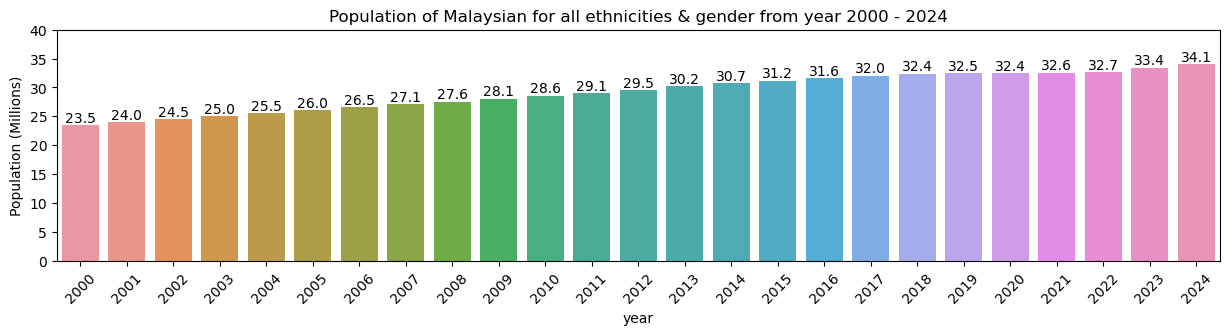

In [76]:
#See growth of population for all ethnicities, gender & age

subset = sub_data[(sub_data['sex'] == 'both') & (sub_data['age'] == 'overall') & (sub_data['ethnicity'] == 'overall')]

plt.figure(figsize=(15,3))
ax = sns.barplot(data=subset, x='year', y='population',errorbar=None)

# Add values on top of each bar (converted to millions)
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # x-position: center of the bar
        height,                             # y-position: top of the bar
        f'{height / 1000:.1f}',           # Label (in millions, 1 decimal)
        ha='center',                        # Horizontal alignment
        va='bottom'                         # Vertical alignment
    )

plt.ylabel('Population (Millions)')
plt.yticks(ticks=plt.yticks()[0],labels=[int(y/1000) for y in plt.yticks()[0]])
plt.xticks(rotation=45)
plt.title('Population of Malaysian for all ethnicities & gender from year 2000 - 2024')
plt.show()

In [21]:
subset_age = sub_data[(sub_data['sex'] == 'both') & (sub_data['age'] != 'overall') & (sub_data['ethnicity'] == 'overall')]

In [22]:
def categorize_age(age):
    if age in ['0-4', '5-9', '10-14', '15-19']:
        return 'Young'
    elif age in ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59']:
        return 'Adult'
    elif age in ['60-64', '65-69', '70-74', '75-79', '80-84', '85+']:
        return 'Senior'
    else:
        return 'Overall'  # For the 'overall' category

In [ ]:
subset_age['age_category'] = subset_age['age'].apply(categorize_age)
subset_age_gp = subset_age.groupby(['year','age_category']).agg(population = ('population','sum')).reset_index()
subset_age_gp['age_category'] = subset_age_gp['age_category'].replace({'Young':'Young: Below 19Y',
                                                                      'Adult':'Adult: 20Y - 59Y',
                                                                      'Senior': 'Senior: Above 60Y'})

In [24]:
subset_age_2000 = subset_age_gp[subset_age_gp['year']==2000]

In [25]:
subset_age_2024 = subset_age_gp[subset_age_gp['year']==2024]

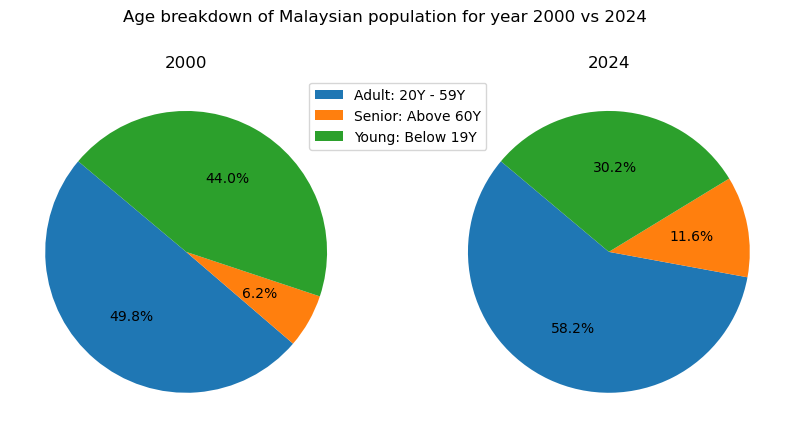

In [26]:
fig, axes = plt.subplots(1,2,figsize=(10,5))

axes[0].pie(
    subset_age_2000['population'],
    autopct='%1.1f%%',
    startangle=140,
)

axes[1].pie(
    subset_age_2024['population'],
    autopct='%1.1f%%',
    startangle=140,
)

plt.suptitle('Age breakdown of Malaysian population for year 2000 vs 2024')

axes[0].set_title('2000')
axes[1].set_title('2024')
plt.legend(subset_age_2024['age_category'], loc='upper left',bbox_to_anchor=(-0.37, 1))
plt.show()


In [27]:
subset_age_20_24 = subset_age_gp[(subset_age_gp['year']==2024) | (subset_age_gp['year']==2000)].reset_index(drop=True)
subset_age_20_24['population'] = round(subset_age_20_24['population']/1000,2)
subset_age_20_24_piv = subset_age_20_24.pivot(index='age_category',columns='year',values='population')
subset_age_20_24_piv 

year,2000,2024
age_category,,
Adult: 20Y - 59Y,11.71,19.83
Senior: Above 60Y,1.45,3.95
Young: Below 19Y,10.34,10.28


In [28]:
subset_age_20_24 = subset_age_gp[(subset_age_gp['year']==2024) | (subset_age_gp['year']==2000)].reset_index(drop=True)
subset_age_20_24['population'] = subset_age_20_24['population']
subset_age_20_24_piv = subset_age_20_24.pivot(index='age_category',columns='year',values='population')
subset_age_20_24_piv 

year,2000,2024
age_category,,
Adult: 20Y - 59Y,11705.1,19830.1
Senior: Above 60Y,1451.2,3949.9
Young: Below 19Y,10338.8,10279.1


In [29]:
subset_age_20_24['population']/1000

0    11.7051
1     1.4512
2    10.3388
3    19.8301
4     3.9499
5    10.2791
Name: population, dtype: float64

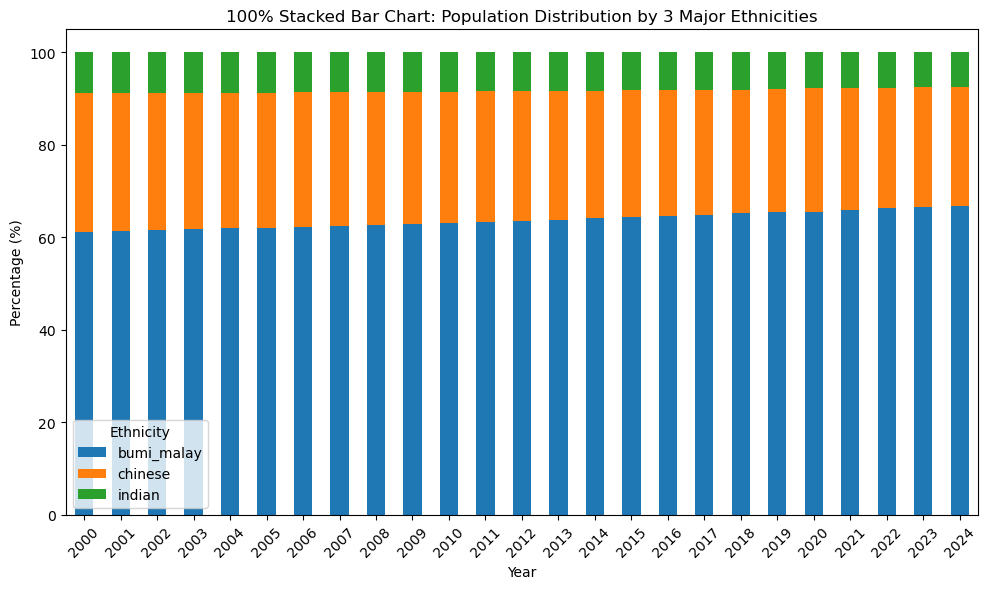

In [30]:
#See portion of ethicities.

#Subset to include overall ages, & both gender. Also drop all ethinicities except 3 major races
subset = sub_data[((sub_data['sex'] == 'both') & (sub_data['age'] == 'overall')) & 
(sub_data['ethnicity'].isin(['bumi_malay','chinese','indian']))]

#Pivot the DataFrame to have 'year' as the index and 'ethnicity' as columns
subset_pivot = subset.pivot(index='year', columns='ethnicity', values='population')

#Convert to percentages for 100% stacked bar chart
subset_percent = subset_pivot.div(subset_pivot.sum(axis=1), axis=0) * 100

ax = subset_percent.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
)

# Customize the plot
plt.ylabel('Percentage (%)')                # Label for y-axis
plt.xlabel('Year')                         # Label for x-axis
plt.title('100% Stacked Bar Chart: Population Distribution by 3 Major Ethnicities')  # Chart title
plt.legend(title='Ethnicity')             # Legend with title
plt.xticks(rotation=45)                    # Keep x-axis labels horizontal
plt.tight_layout()

plt.show()

In [31]:
round(subset_percent,2)

ethnicity,bumi_malay,chinese,indian
year,,,
2000,61.25,29.94,8.81
2001,61.39,29.82,8.78
2002,61.57,29.67,8.76
2003,61.74,29.53,8.73
2004,61.92,29.37,8.71
2005,62.11,29.22,8.68
2006,62.29,29.06,8.64
2007,62.49,28.90,8.61
2008,62.68,28.74,8.58


In [32]:
from sklearn.linear_model import LinearRegression

# Prepare data for forecasting
years = subset_percent.index.values.reshape(-1, 1)  # Reshape for sklearn
future_years = np.arange(2025, 2076).reshape(-1, 1)  # Future years

# Forecast for each ethnicity
forecast_results = {}
for ethnicity in subset_percent.columns:
    model = LinearRegression()
    model.fit(years, subset_percent[ethnicity])
    forecast = model.predict(future_years)
    forecast_results[ethnicity] = forecast

# Display forecasted results
forecast_df = pd.DataFrame(forecast_results, index=future_years.flatten())
print(round(forecast_df,2))

      bumi_malay  chinese  indian
2025       66.81    25.62    7.58
2026       67.04    25.44    7.52
2027       67.28    25.26    7.46
2028       67.51    25.08    7.41
2029       67.75    24.90    7.35
2030       67.98    24.72    7.30
2031       68.21    24.54    7.24
2032       68.45    24.36    7.19
2033       68.68    24.18    7.13
2034       68.92    24.01    7.08
2035       69.15    23.83    7.02
2036       69.39    23.65    6.97
2037       69.62    23.47    6.91
2038       69.85    23.29    6.86
2039       70.09    23.11    6.80
2040       70.32    22.93    6.74
2041       70.56    22.75    6.69
2042       70.79    22.57    6.63
2043       71.03    22.40    6.58
2044       71.26    22.22    6.52
2045       71.49    22.04    6.47
2046       71.73    21.86    6.41
2047       71.96    21.68    6.36
2048       72.20    21.50    6.30
2049       72.43    21.32    6.25
2050       72.67    21.14    6.19
2051       72.90    20.96    6.13
2052       73.13    20.79    6.08
2053       73.

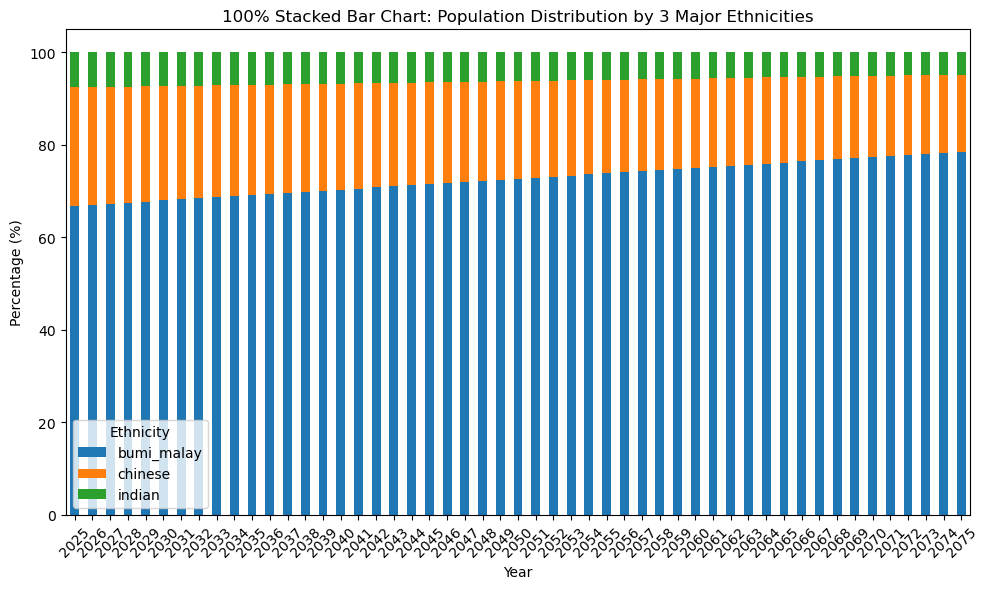

In [33]:
#See portion of ethicities forecast

ax = forecast_df.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
)

# Customize the plot
plt.ylabel('Percentage (%)')                # Label for y-axis
plt.xlabel('Year')                         # Label for x-axis
plt.title('100% Stacked Bar Chart: Population Distribution by 3 Major Ethnicities')  # Chart title
plt.legend(title='Ethnicity')             # Legend with title
plt.xticks(rotation=45)                    # Keep x-axis labels horizontal
plt.tight_layout()

plt.show()

In [34]:
def summarize_model(model, X, y):
    print("Model Summary:")
    print(f"Intercept: {model.intercept_}")
    print(f"Coefficients: {model.coef_}")

    # Performance metrics
    predictions = model.predict(X)
    mse = np.mean((predictions - y) ** 2)
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {model.score(X, y)}")

# Example usage
ethnicity_model = LinearRegression()
ethnicity_model.fit(years, subset_percent['chinese'])  # Replace 'EthnicityName' with actual column name
summarize_model(ethnicity_model, years, subset_percent['chinese'])


Model Summary:
Intercept: 387.8580572588017
Coefficients: [-0.17888505]
Mean Squared Error: 0.006818968323372889
R^2 Score: 0.9959187694360025


In [35]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Assuming the data preparation steps from before
# Normalize data to percentages
subset_percent = subset_pivot.div(subset_pivot.sum(axis=1), axis=0) * 100

# Prepare data for forecasting
years = subset_pivot.index.values.reshape(-1, 1)  # Reshape for sklearn
future_years = np.arange(2025, 2046).reshape(-1, 1)  # Future years

# Forecast for each ethnicity and generate reports
forecasts = {}
reports = {}

for ethnicity in subset_percent.columns:
    model = LinearRegression()
    model.fit(years, subset_percent[ethnicity])
    forecast = model.predict(future_years)
    forecasts[ethnicity] = forecast
    
    # Generate detailed report using statsmodels
    X2 = sm.add_constant(years)
    est = sm.OLS(subset_percent[ethnicity], X2)
    est2 = est.fit()
    reports[ethnicity] = est2.summary()

# Display forecasts
forecast_df = pd.DataFrame(forecasts, index=future_years.flatten())
print(forecast_df)

# Display detailed reports
for ethnicity, report in reports.items():
    print(f"\nDetailed Report for {ethnicity}:\n")
    print(report)


      bumi_malay    chinese    indian
2025   66.808583  25.615821  7.575596
2026   67.042878  25.436936  7.520186
2027   67.277173  25.258051  7.464776
2028   67.511468  25.079166  7.409366
2029   67.745763  24.900281  7.353956
2030   67.980058  24.721396  7.298546
2031   68.214353  24.542511  7.243135
2032   68.448649  24.363626  7.187725
2033   68.682944  24.184741  7.132315
2034   68.917239  24.005856  7.076905
2035   69.151534  23.826971  7.021495
2036   69.385829  23.648086  6.966085
2037   69.620124  23.469201  6.910675
2038   69.854419  23.290316  6.855265
2039   70.088715  23.111431  6.799855
2040   70.323010  22.932546  6.744445
2041   70.557305  22.753661  6.689034
2042   70.791600  22.574776  6.633624
2043   71.025895  22.395890  6.578214
2044   71.260190  22.217005  6.522804
2045   71.494486  22.038120  6.467394

Detailed Report for bumi_malay:

                            OLS Regression Results                            
Dep. Variable:             bumi_malay   R-squared: 